In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

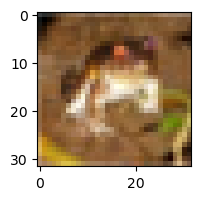

In [11]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [12]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

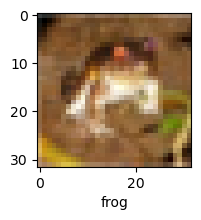

In [15]:
plot_sample(X_train,y_train,0)

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

In [17]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 90s 57ms/step - loss: 1.8115 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.6239 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5412 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4815 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4333 - accuracy: 0.4961


In [18]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4982 - accuracy: 0.4669


[1.4981971979141235, 0.4668999910354614]

In [19]:
cnn= models.Sequential([

    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10


In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9390 - accuracy: 0.6841


[0.9389968514442444, 0.6840999722480774]

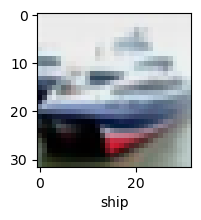

In [22]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [23]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.8249001e-02, 1.0058852e-03, 2.5317540e-02, 7.4260807e-01,
        5.1992317e-03, 1.7690715e-01, 2.6814817e-02, 3.7581628e-04,
        3.0918550e-03, 4.3065200e-04],
       [1.2718184e-02, 3.5183881e-03, 1.1767552e-06, 7.1817152e-07,
        1.1220793e-07, 6.9377819e-08, 4.8565236e-09, 9.8057363e-08,
        9.8358548e-01, 1.7579447e-04],
       [1.4482304e-01, 1.4393935e-01, 5.7111715e-04, 6.4028646e-03,
        6.3109830e-05, 4.7467224e-04, 4.1001898e-05, 2.7756202e-03,
        6.4627832e-01, 5.4630928e-02],
       [9.5248187e-01, 2.6078487e-02, 1.3921178e-03, 4.5218033e-04,
        4.3996426e-04, 1.3945360e-05, 2.2945420e-05, 9.6939570e-05,
        1.2980277e-02, 6.0411836e-03],
       [8.9359619e-06, 9.7302855e-06, 4.2567612e-03, 7.4413577e-03,
        9.5765316e-01, 3.3449212e-03, 2.7256131e-02, 1.8719840e-05,
        8.3121313e-06, 1.9721235e-06]], dtype=float32)

In [24]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [25]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

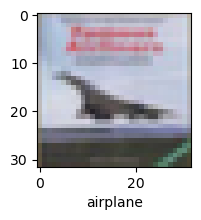

In [30]:
plot_sample(X_test,y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'